# IMPORTING LIBRARIES

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras import regularizers

# MOUNTING DATASET

In [20]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOADING THE DATASET

In [21]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/drive/My Drive/AI_MedProject/diabetes.csv')

# EXPLANATORY DATA ANALYSIS

In [22]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [24]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [26]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# PLOTTING THE DISTRIBUTION BETWEEN THE VARIABLES

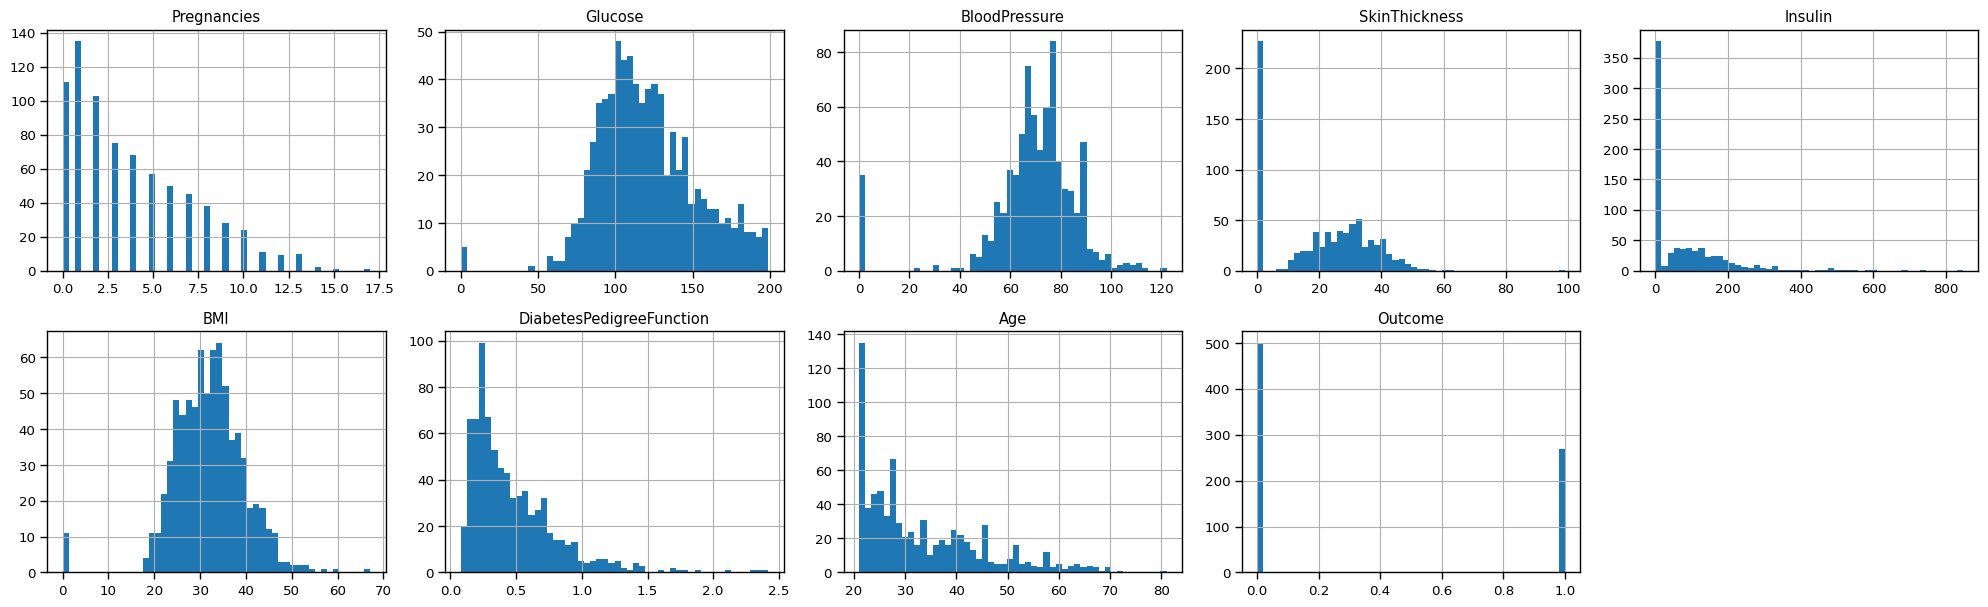

In [27]:
# Create a new figure with a larger size
plt.figure(figsize=(20, 15))

# Iterate through each column in the DataFrame
for i, col in enumerate(diabetes_dataset):
    # Create a subplot for each variable
    plt.subplot(5, 5, i+1)

    # Plot the histogram for the current variable
    diabetes_dataset[col].hist(bins=50)

    # Set the title of the subplot
    plt.title(col)

plt.tight_layout()
plt.show()

In [28]:
import plotly.express as px
fig = px.histogram(diabetes_dataset, x="Outcome", color = "BloodPressure", barmode = "group", title = "<b>BloodPressure distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

<ipython-input-29-7e695779b39c>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-29-7e695779b39c>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




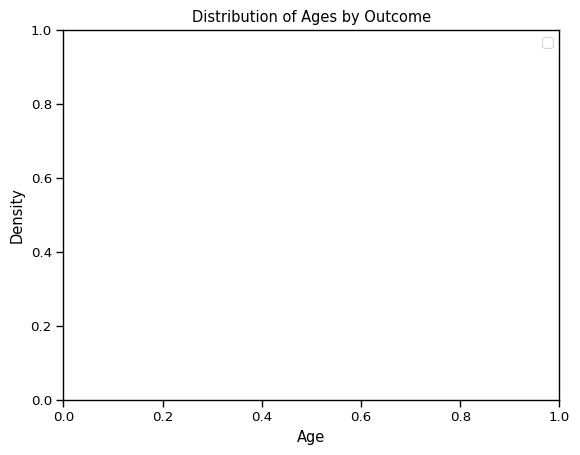

In [29]:
import seaborn as sns
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(diabetes_dataset.Age[(diabetes_dataset["Outcome"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(diabetes_dataset.Age[(diabetes_dataset["Outcome"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Negative Outcome","Positive Outcome"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of Ages by Outcome');

In [30]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [31]:
fig = px.box(diabetes_dataset, x='Outcome', y = 'Glucose')

# Update yaxis properties
fig.update_yaxes(title_text='Glucose (level)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Outcome', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Glucose vs Outcome</b>',
)

fig.show()

In [32]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [33]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# TRAIN TEST SPLIT

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [36]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DEFINING THE MODEL, TRAINING AND TESTING

Epoch 1/600
16/16 [==============================] - 1s 21ms/step - loss: 1.4067 - accuracy: 0.6049 - val_loss: 1.3261 - val_accuracy: 0.6829 - lr: 0.0010
Epoch 2/600
16/16 [==============================] - 0s 7ms/step - loss: 1.2768 - accuracy: 0.6802 - val_loss: 1.2181 - val_accuracy: 0.6992 - lr: 0.0010
Epoch 3/600
 1/16 [>.............................] - ETA: 0s - loss: 1.2313 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



16/16 [==============================] - 0s 6ms/step - loss: 1.1403 - accuracy: 0.7312 - val_loss: 1.1259 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 4/600
16/16 [==============================] - 0s 7ms/step - loss: 1.0582 - accuracy: 0.7128 - val_loss: 1.0492 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 5/600
16/16 [==============================] - 0s 6ms/step - loss: 0.9971 - accuracy: 0.7413 - val_loss: 0.9855 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 6/600
16/16 [==============================] - 0s 6ms/step - loss: 0.9212 - accuracy: 0.7576 - val_loss: 0.9323 - val_accuracy: 0.7073 - lr: 0.0010
Epoch 7/600
16/16 [==============================] - 0s 6ms/step - loss: 0.8798 - accuracy: 0.7800 - val_loss: 0.8864 - val_accuracy: 0.6992 - lr: 0.0010
Epoch 8/600
16/16 [==============================] - 0s 7ms/step - loss: 0.8249 - accuracy: 0.7617 - val_loss: 0.8458 - val_accuracy: 0.7073 - lr: 0.0010
Epoch 9/600
16/16 [==============================] - 0s 6ms/step - loss: 0.7885 - accura

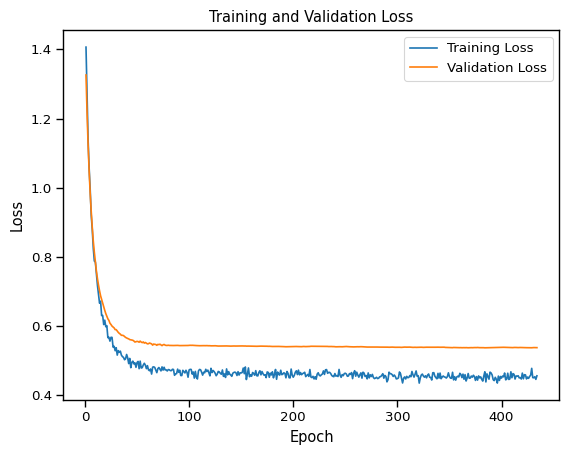

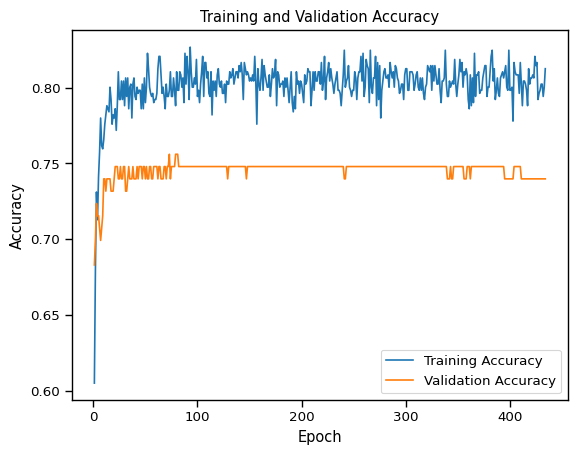

In [37]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))
class LossRateCallback(Callback):
    def __init__(self):
        super().__init__()
        self.loss_rates = []

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.loss_rates.append(loss)

# Create an instance of the callback
loss_callback = LossRateCallback()

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_layer, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Define the ModelCheckpoint callback to save the weights of the best model
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model and get the loss rates
history = model.fit(X_train_scaled, Y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1, callbacks=[loss_callback, early_stopping, reduce_lr, mcp_save])

# Get the training and validation metrics from the history object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
num_epochs = len(training_loss)

# Plot the training and validation loss
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# MODEL EVALUATION

In [38]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(Y_test, y_pred_binary)
auc_score = roc_auc_score(Y_test, y_pred)

5/5 [==============================] - 0s 2ms/step


In [39]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.8f}')
print(f'AUC Score: {auc_score:.8f}')

Accuracy: 0.75324675
AUC Score: 0.80537037


# MAKING A PREDICTIVE SYSTEM


In [40]:
import numpy as np
from tensorflow.keras.models import load_model

# Define the input data
input_data = np.array([[5, 166, 72, 19, 175, 25.8, 0.587, 51]])

# Load the trained model
model = load_model('weight.hdf5')

# Perform feature scaling on the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions
prediction = model.predict(input_data_scaled)

# Print the prediction
if prediction[0][0] < 0.5:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

1/1 [==============================] - 0s 62ms/step
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# SAVING THE MODEL

In [41]:
model.save('/content/drive/My Drive/Colab Notebooks/AI_MedProject/DiseasePrediction/diabetes_model.sav')